### Описание задания

Построить модель GARCH для временного ряда.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model
from scipy.stats import boxcox
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

Из прошлого проекта [Introducing_in_time_series](../1_Introducing_in_time_series/introducing_in_time_series.ipynb) один не стационарный временной ряд "Monthly sales of company" с трендом и сезонностью.

In [2]:
sales_of_company = pd.read_csv('../Data/monthly-sales-of-company-x-jan-6.csv')['Count']

### Необходимые функции

In [3]:
def test_stationarity(timeseries):
    """Dickey-Fuller Test"""
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    """Make original, autocorrelation(ACR) and partial autocorrelation(PACF) plots"""
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05, method='ywm')
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    plt.show()
    return

### Подготовка данных для модели.

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


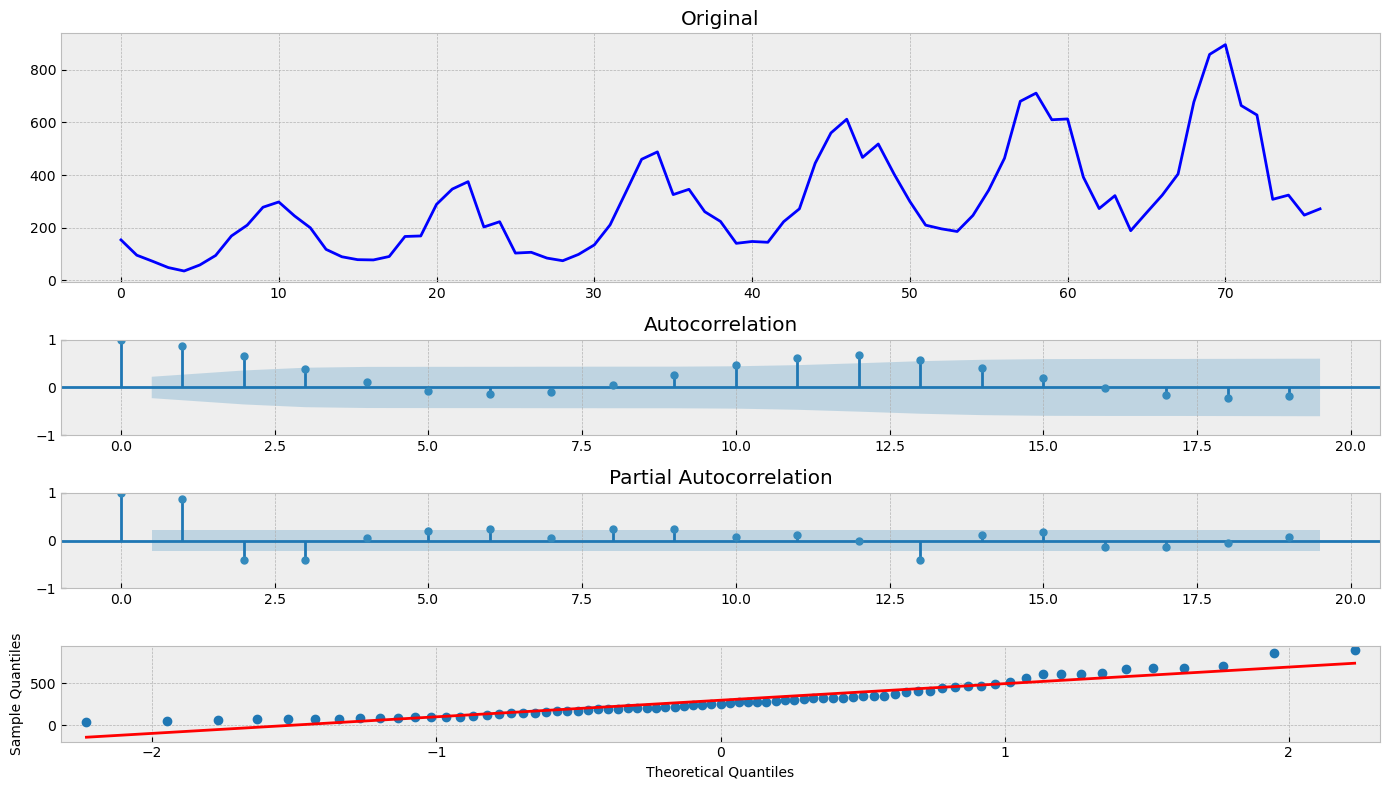

In [4]:
tsplot(sales_of_company)

Повторим действия по приведению временного ряда к стационарному виду из [Introducing_in_time_series](../1_Introducing_in_time_series/introducing_in_time_series.ipynb):
- преобразование Бокса-Кокса
- дифференцирование
- дифференцирование с лагом 12
- дифференцирование

In [5]:
sales_of_company = boxcox(sales_of_company, 0)
sales_of_company = sales_of_company[1:] - sales_of_company[:-1]
sales_of_company = sales_of_company[12:] - sales_of_company[:-12]
sales_of_company = sales_of_company[1:] - sales_of_company[:-1]

Удостоверимся, что после преобразования ряд стационарен.

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


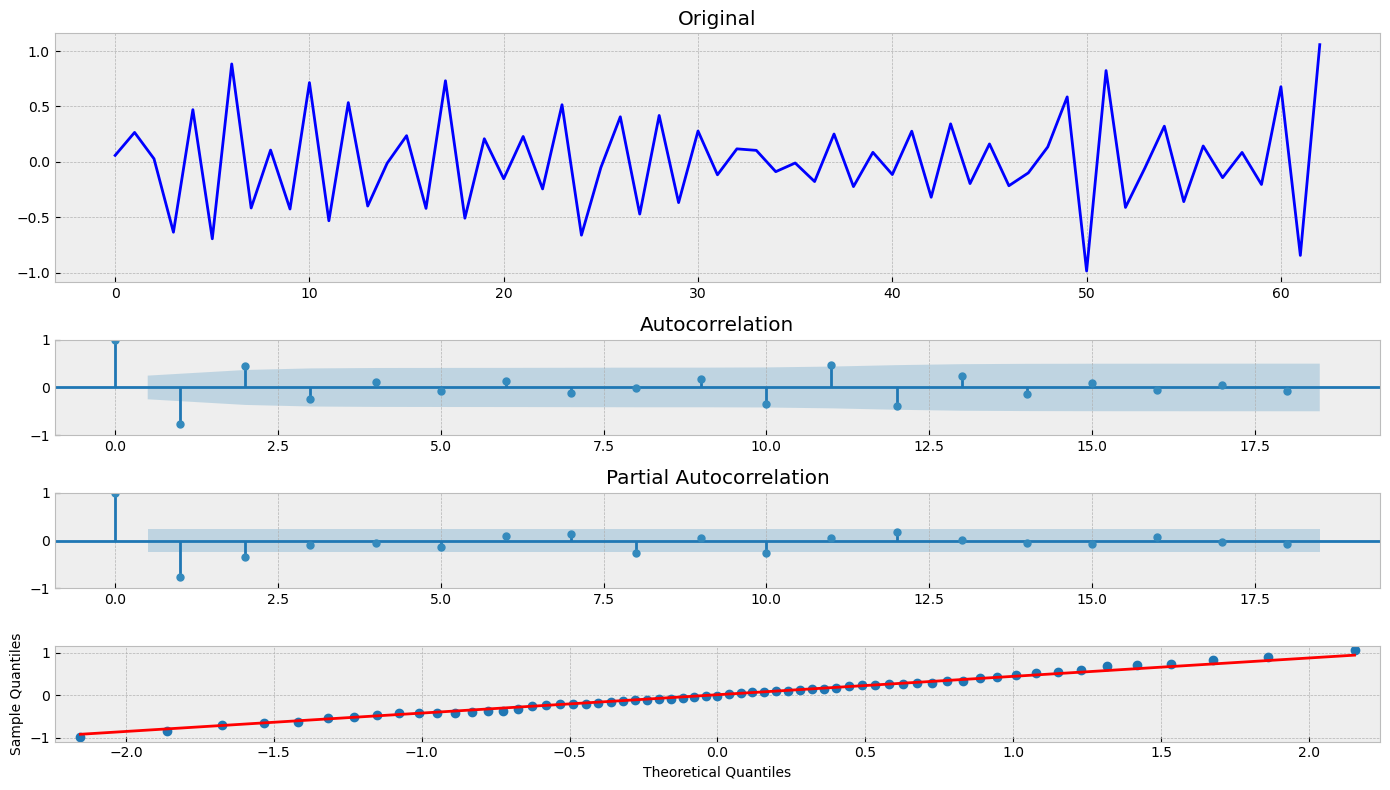

In [6]:
tsplot(sales_of_company)

Визуально и по результатам теста Дики-Фуллера мы можем отвергнуть гипотезу о нестационарности ряда.

### Построение модели GARCH

In [7]:
am = arch_model(sales_of_company)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     32,   Neg. LLF: 29.20585719120303
Iteration:     10,   Func. Count:     57,   Neg. LLF: 29.16989026621792
Optimization terminated successfully    (Exit mode 0)
            Current function value: 29.16989026621792
            Iterations: 11
            Function evaluations: 61
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -29.1699
Distribution:                  Normal   AIC:                           66.3398
Method:            Maximum Likelihood   BIC:                           74.9123
                                        No. Observations:                   63
Date:                Tue, Jun 06 2023   Df Residuals:                       62
Time:          

### Выводы:

Нестационарный временной ряд был приведён к стационарному виду и на основе его была построена модель GARCH. Информационный критерий AIC для получившейся модели равен 66, что говорит о высокой точности модели.